<a href="https://colab.research.google.com/github/Sakshi281204/Data-Science/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Performance Prediction

In [1]:
# -------------------------------
# 1. IMPORT LIBRARIES
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Kaggle Dataset link :-https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics

In [2]:
# -------------------------------
# 2. LOAD DATASET
# -------------------------------
# Using a public Kaggle dataset (Student Performance Data)
# If running locally, upload file using Google Colab's upload option

from google.colab import files
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
df.head()


Saving exams.csv to exams.csv


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


In [3]:
# -------------------------------
# 3. CHECK DATA INFO
# -------------------------------
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [4]:
# -------------------------------
# 4. HANDLE MISSING VALUES
# -------------------------------
df = df.dropna()  # or use df.fillna(df.mean())
df.isnull().sum()


,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


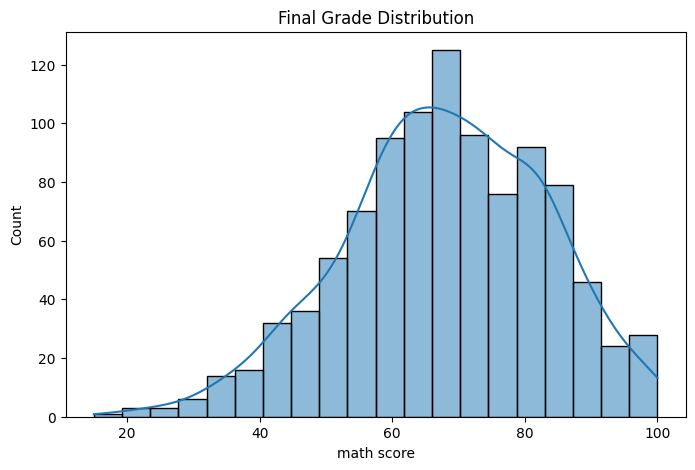

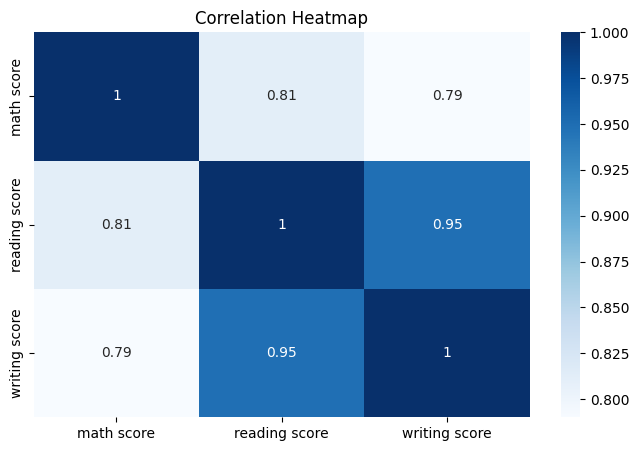

In [7]:
# -------------------------------
# 5. EXPLORATORY DATA ANALYSIS (EDA)
# -------------------------------

plt.figure(figsize=(8,5))
sns.histplot(df['math score'], kde=True)
plt.title("Final Grade Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()



In [9]:
# -------------------------------
# 6. SELECT FEATURES AND TARGET
# -------------------------------

X = df.drop('math score', axis=1)   # math score = Final Grade (target)
y = df['math score']

# For categorical columns → convert to numbers
X = pd.get_dummies(X, drop_first=True)

X.head()


,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,70,78,False,False,False,True,False,False,False,False,True,False,True,False
1,93,87,True,False,False,True,False,False,False,False,False,False,True,True
2,76,77,False,False,False,True,False,False,False,False,True,False,False,True
3,70,63,True,True,False,False,False,False,False,False,True,False,False,True
4,85,86,False,False,False,True,False,False,False,False,False,False,True,True


In [10]:
# -------------------------------
# 7. TRAIN-TEST SPLIT
# -------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
# -------------------------------
# 8. MODEL 1: LINEAR REGRESSION
# -------------------------------

lr = LinearRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)

print("Linear Regression Results:")
print("MAE:", mean_absolute_error(y_test, pred_lr))
print("MSE:", mean_squared_error(y_test, pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_lr)))
print("R2 Score:", r2_score(y_test, pred_lr))


Linear Regression Results:
MAE: 4.073537121893527
MSE: 24.83855821054257
RMSE: 4.983829673107074
R2 Score: 0.8874881345612097


In [12]:
# -------------------------------
# 9. MODEL 2: RANDOM FOREST
# -------------------------------

rf = RandomForestRegressor(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)

print("Random Forest Results:")
print("MAE:", mean_absolute_error(y_test, pred_rf))
print("MSE:", mean_squared_error(y_test, pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_rf)))
print("R2 Score:", r2_score(y_test, pred_rf))


Random Forest Results:
MAE: 4.599433333333334
MSE: 32.696902
RMSE: 5.71812049540756
R2 Score: 0.8518919895870656


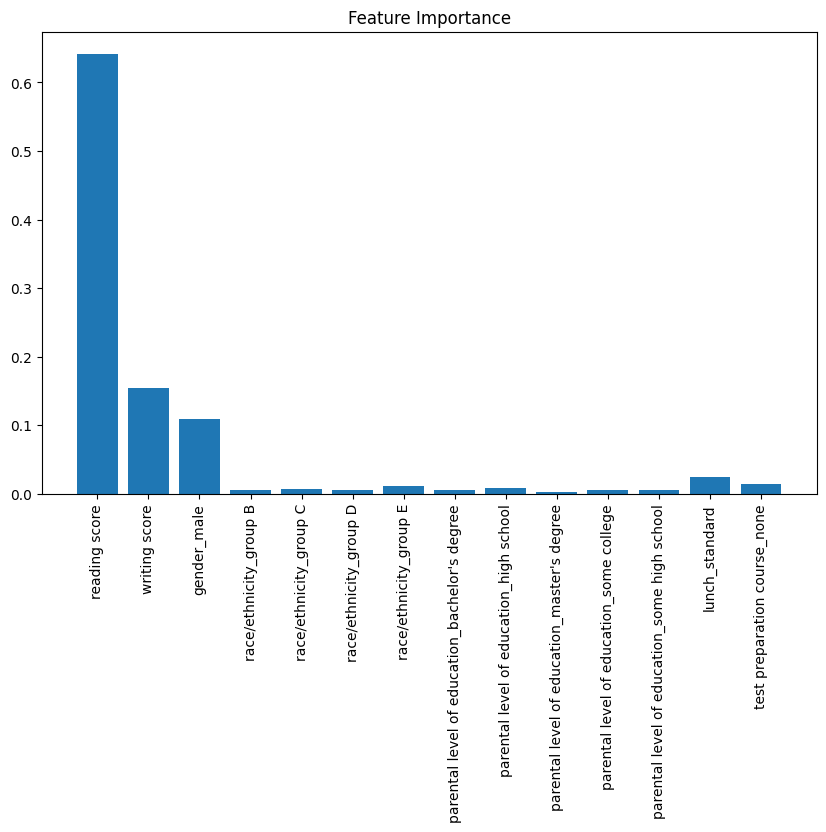

In [14]:
# -------------------------------
# 10. FEATURE IMPORTANCE (RF)
# -------------------------------
plt.figure(figsize=(10,6))
importance = rf.feature_importances_
plt.bar(X.columns, importance)
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.show()
